# NOTEBOOK 1 (EDA + DATA PREPROCESSING)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [46]:
plt.style.use("ggplot")
sns.set(font_scale=1.1)

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
# Basic info
print("Shape:", df.shape)
df.info()

Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [48]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ", np.nan))
df = df.dropna()
df = df.drop_duplicates()

df = df.drop(columns=["customerID"])

binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in binary_cols:
    df[col] = df[col].replace({"Yes": 1, "No": 0})

df["gender"] = df["gender"].replace({"Male": 1, "Female": 0})

multi_cols = df.select_dtypes(include="object").columns
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clean_df = pd.concat([X, y], axis=1)
clean_df = clean_df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
clean_df.to_csv("clean_telco_dataset.csv", index=False)




/tmp/ipython-input-3664640052.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({"Yes": 1, "No": 0})
/tmp/ipython-input-3664640052.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"] = df["gender"].replace({"Male": 1, "Female": 0})
/tmp/ipython-input-3664640052.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean_df = clean_df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [49]:
# ============================================================
# FIX 0/1 LABELS FOR VISUALIZATION ONLY
# ============================================================

plot_df = df.copy()

# Gender
plot_df["gender"] = plot_df["gender"].map({1: "Male", 0: "Female"})

# Churn
plot_df["Churn"] = plot_df["Churn"].map({1: "Yes", 0: "No"})

# Other Binary Columns (Yes/No)
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]

for col in binary_cols:
    if col in plot_df.columns:
        plot_df[col] = plot_df[col].map({1: "Yes", 0: "No"})


Churn Distribution

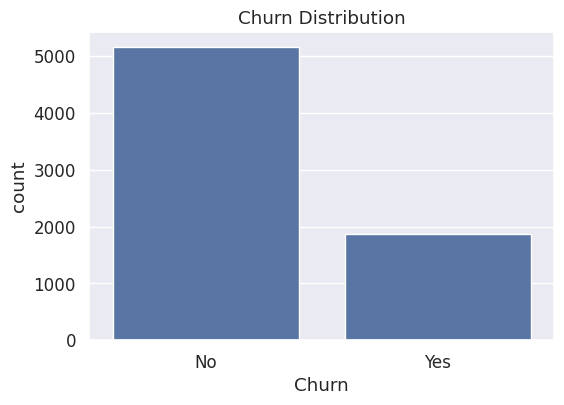

Churn Percentage:
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [50]:
plt.figure(figsize=(6,4))
sns.countplot(data=plot_df, x="Churn")
plt.title("Churn Distribution")
plt.show()

print("Churn Percentage:\n", plot_df["Churn"].value_counts(normalize=True) * 100)


Numerical Histograms Graph

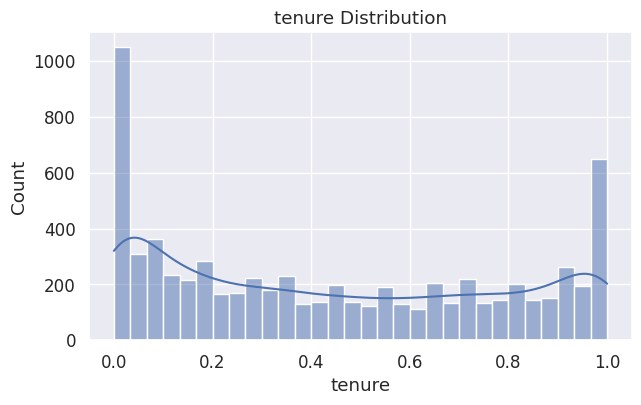

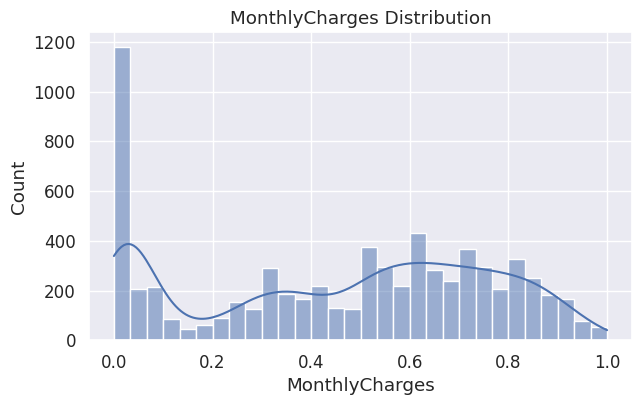

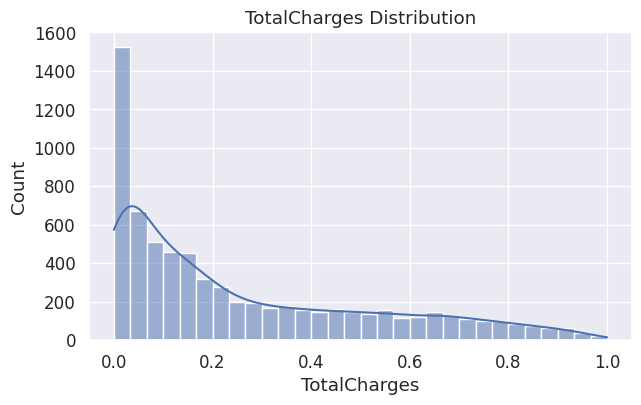

In [51]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(plot_df[col], bins=30, kde=True)
    plt.title(f"{col} Distribution")
    plt.show()


Churn vs Numerical (Boxplots)

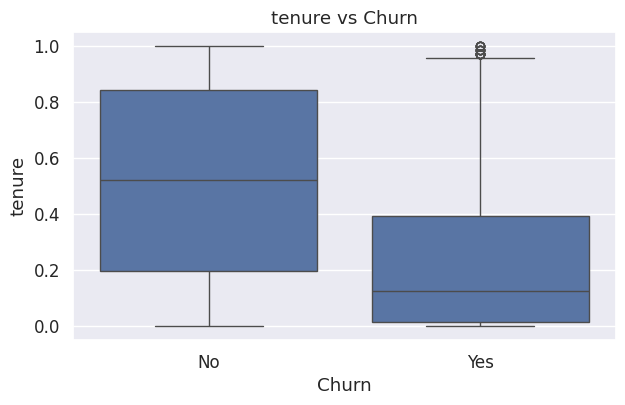

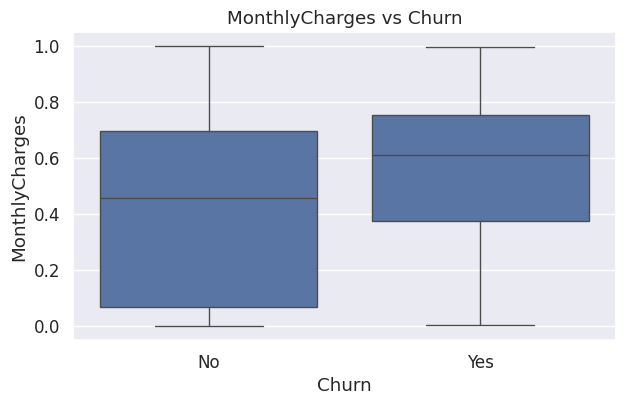

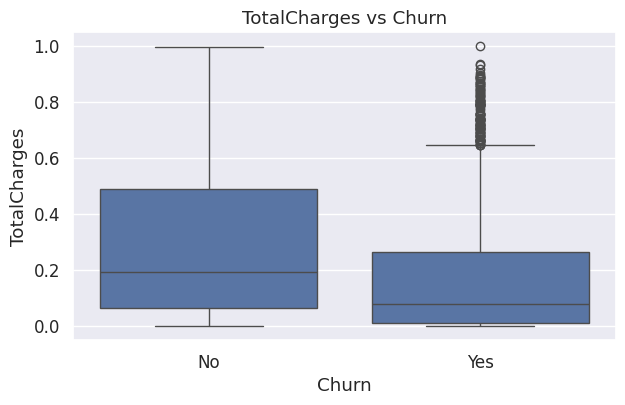

In [52]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=plot_df, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.show()


Gender vs Churn

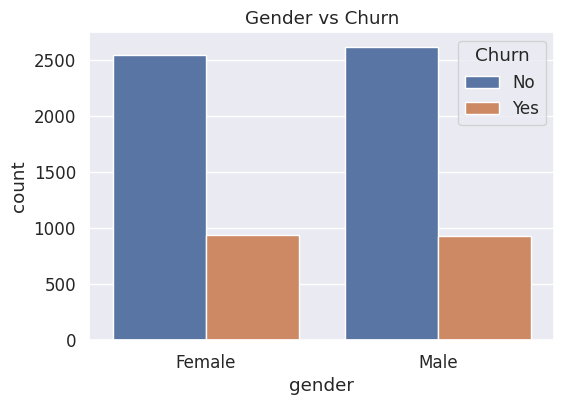

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(data=plot_df, x="gender", hue="Churn")
plt.title("Gender vs Churn")
plt.show()


SeniorCitizen vs Churn

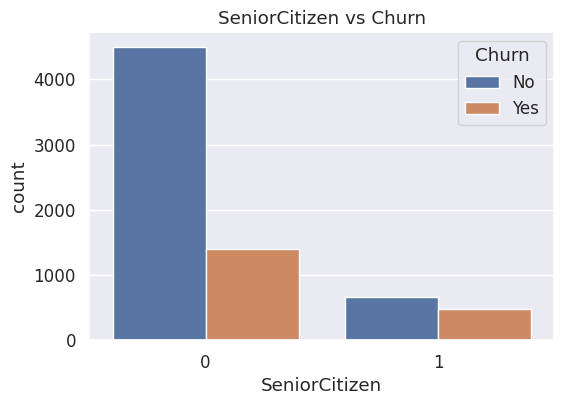

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(data=plot_df, x="SeniorCitizen", hue="Churn")
plt.title("SeniorCitizen vs Churn")
plt.show()


Partner vs Churn

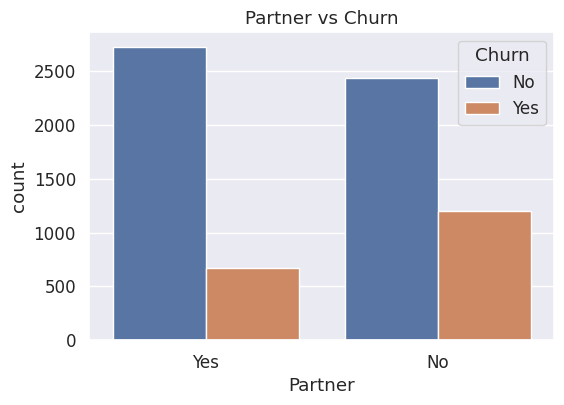

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(data=plot_df, x="Partner", hue="Churn")
plt.title("Partner vs Churn")
plt.show()


Dependents vs Churn

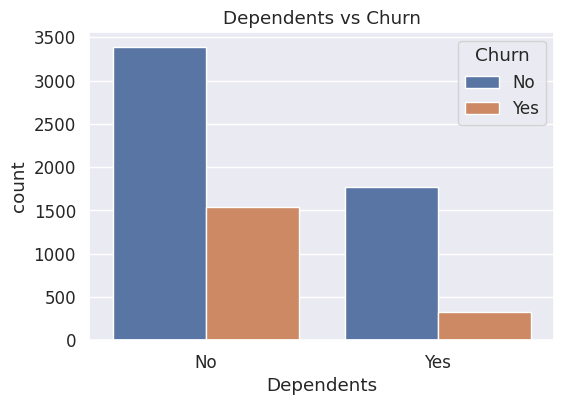

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(data=plot_df, x="Dependents", hue="Churn")
plt.title("Dependents vs Churn")
plt.show()


PhoneService vs Churn

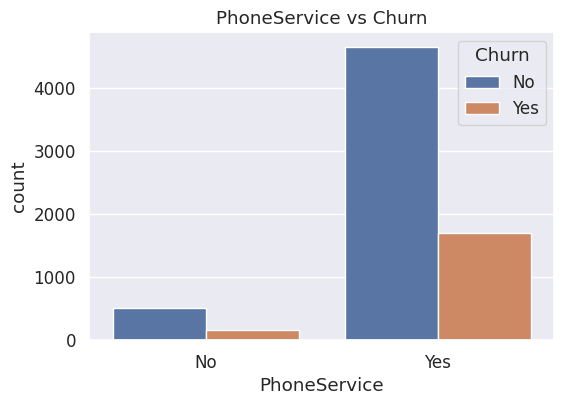

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(data=plot_df, x="PhoneService", hue="Churn")
plt.title("PhoneService vs Churn")
plt.show()


MultipleLines vs Churn

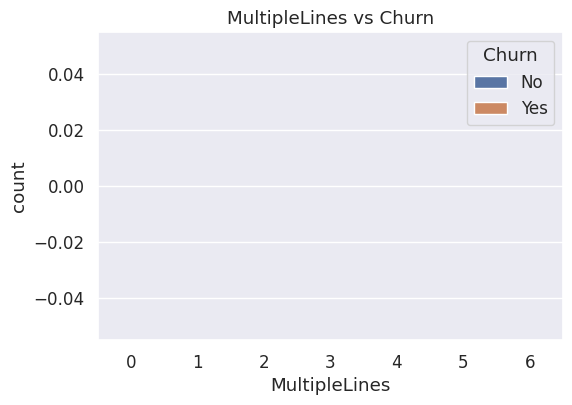

In [58]:
if "MultipleLines_Yes" in plot_df.columns:
    plot_df["MultipleLines"] = plot_df["MultipleLines_Yes"].map({1: "Yes", 0: "No"})

plt.figure(figsize=(6,4))
sns.countplot(data=plot_df, x="MultipleLines", hue="Churn")
plt.title("MultipleLines vs Churn")
plt.show()


InternetService vs Churn

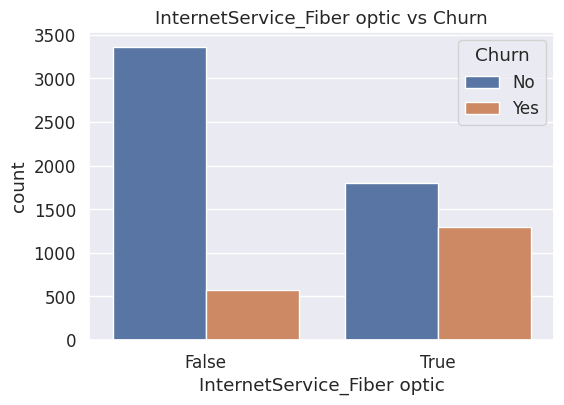

In [59]:
service_cols = ["InternetService_DSL", "InternetService_Fiber optic"]

for col in service_cols:
    if col in plot_df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=plot_df, x=col, hue="Churn")
        plt.title(f"{col} vs Churn")
        plt.show()


Contract Type vs Churn

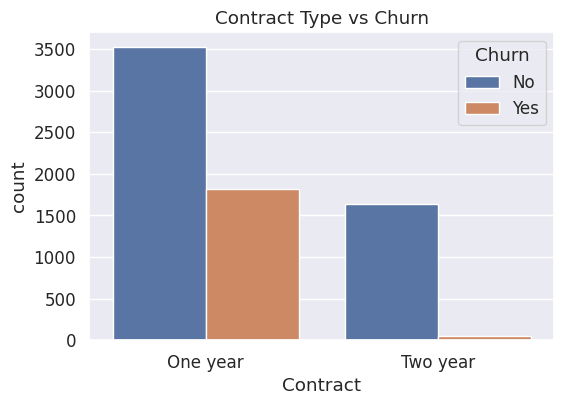

In [60]:
contract_map = {
    0: "Month-to-month",
    1: "One year",
    2: "Two year"
}

if "Contract_One year" in df.columns and "Contract_Two year" in df.columns:
    plot_df["Contract"] = plot_df[["Contract_One year", "Contract_Two year"]].idxmax(axis=1)
    plot_df["Contract"] = plot_df["Contract"].map({
        "Contract_One year": "One year",
        "Contract_Two year": "Two year"
    }).fillna("Month-to-month")

plt.figure(figsize=(6,4))
sns.countplot(data=plot_df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.show()


Tenure Distribution

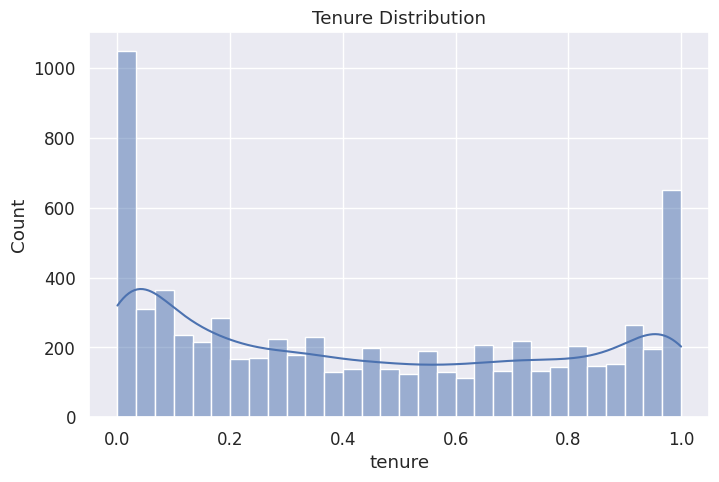

In [61]:
# Histogram: Tenure
plt.figure(figsize=(8,5))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()


Monthly Charge Vs Churn

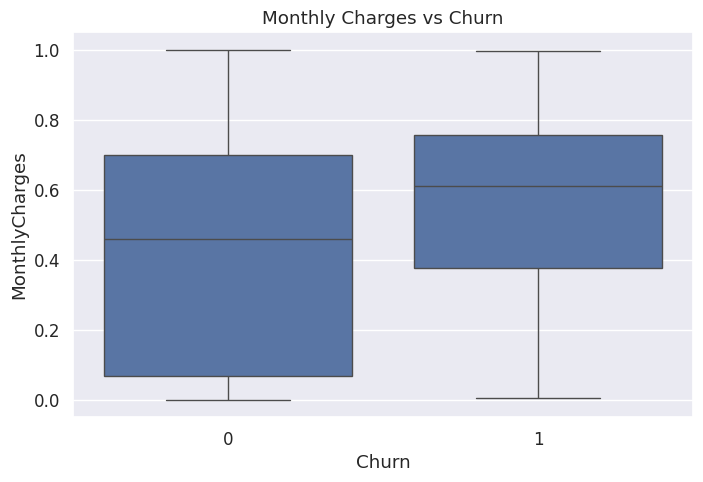

In [62]:
# Monthly Charges vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.show()


Correlation Heatmap

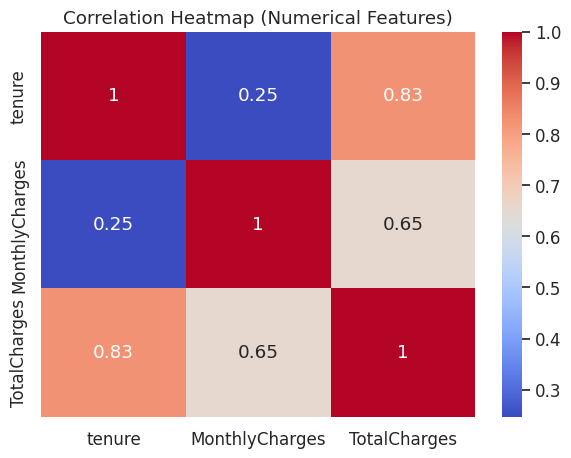

In [63]:
# Only numerical features
num_df = df[["tenure", "MonthlyCharges", "TotalCharges"]]

plt.figure(figsize=(7,5))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


# NOTEBOOK 2 — MODEL TRAINING (ANN + DECISION TREE )

After SMOTE: (8260, 30) (8260,)
Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5886 - loss: 0.7305 - val_accuracy: 0.7207 - val_loss: 0.5721
Epoch 2/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7482 - loss: 0.5868 - val_accuracy: 0.7278 - val_loss: 0.5687
Epoch 3/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7801 - loss: 0.5459 - val_accuracy: 0.7406 - val_loss: 0.5400
Epoch 4/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7761 - loss: 0.5458 - val_accuracy: 0.7278 - val_loss: 0.5555
Epoch 5/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7754 - loss: 0.5262 - val_accuracy: 0.7385 - val_loss: 0.5397
Epoch 6/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7752 - loss: 0.5214 - val_accuracy: 0.7285 - val_loss: 0.5401
Epoch 7/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7798 - loss: 0.5146 - val_accuracy: 0.7441 - val_loss: 0.5292
Epoch 8/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7851 - loss: 0.5079 - val_accuracy: 0.7356 - val_

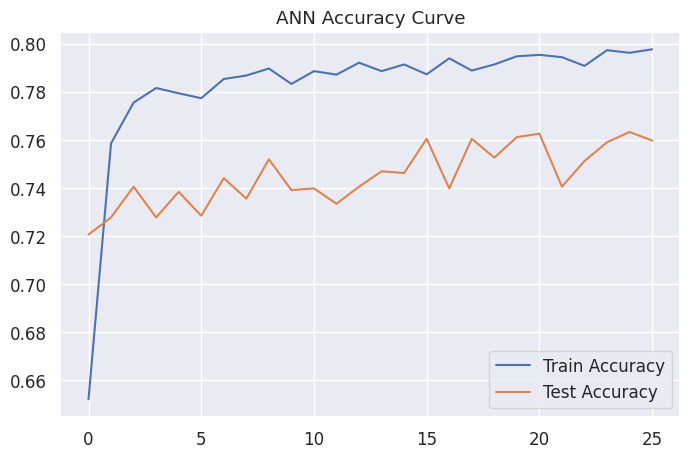

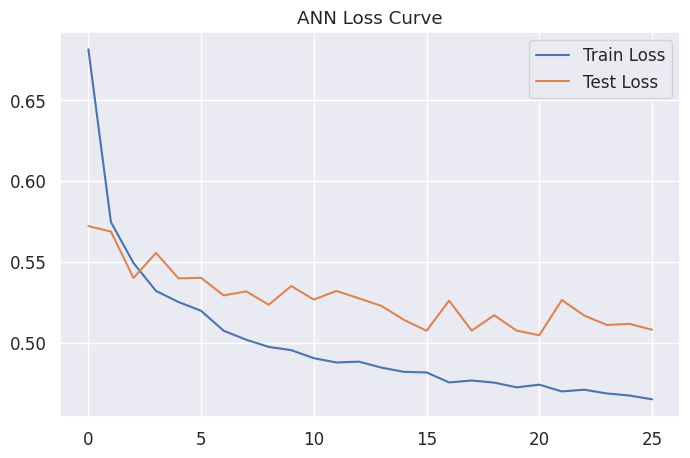

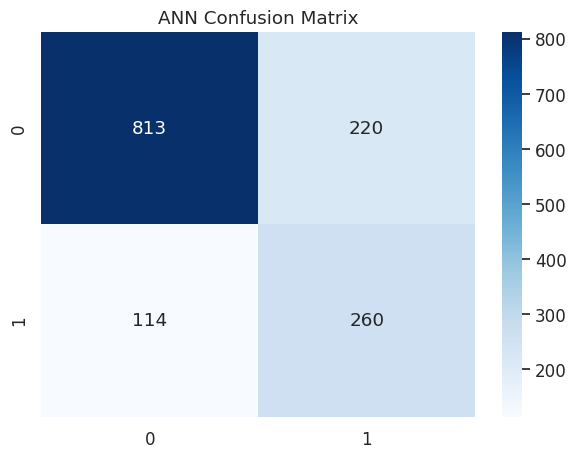

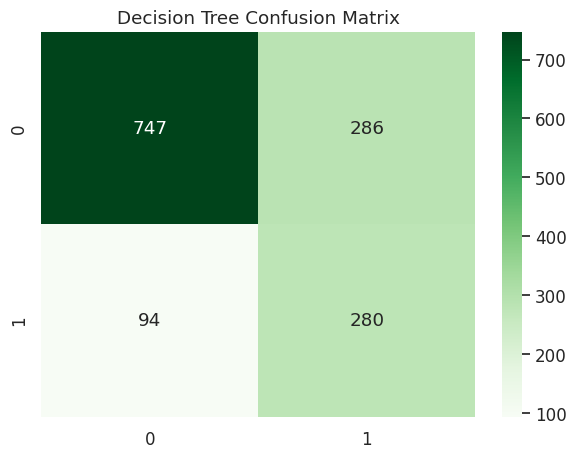

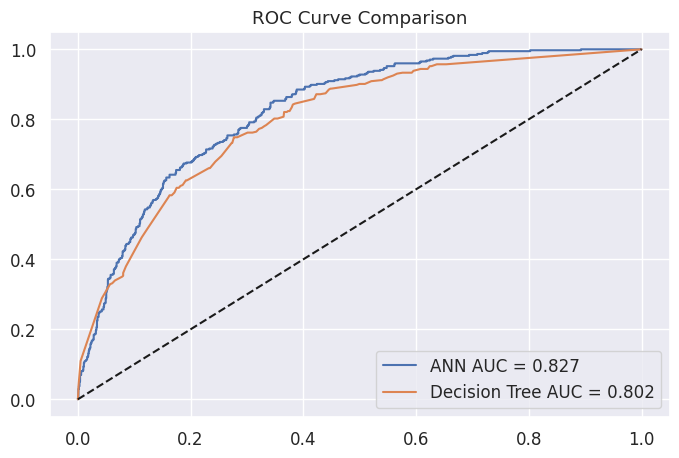


===== ANN RESULTS =====
Train Accuracy: 0.7976997494697571
Test Accuracy: 0.759772539138794
Accuracy Gap: 0.037927210330963135
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1033
           1       0.54      0.70      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407


===== DECISION TREE RESULTS =====
Train Accuracy: 0.7772444444444444
Test Accuracy: 0.7299218194740583
Accuracy Gap: 0.047322624970386085
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.49      0.75      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.78      0.73      0.74      1407


===== FINAL RESULTS TABLE =====
           Model  Train Accuracy  Test Accurac

In [64]:
# ============================================================
# NOTEBOOK 2 — MODEL TRAINING + SMOTE + ANN + DECISION TREE
# Input: clean_telco_dataset.csv
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

plt.style.use("ggplot")
sns.set(font_scale=1.1)


# ============================================================
# LOAD CLEANED DATASET
# ============================================================
df = pd.read_csv("/content/clean_telco_dataset.csv")

X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split BEFORE SMOTE (correct method)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only on training
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("After SMOTE:", X_train_sm.shape, y_train_sm.shape)


# ============================================================
# BUILD IMPROVED ANN MODEL (Reduced Overfitting)
# ============================================================

input_dim = X_train_sm.shape[1]

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=input_dim, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(8, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation="sigmoid"))

optimizer = Adam(learning_rate=0.0007)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    X_train_sm, y_train_sm,
    validation_data=(X_test, y_test),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
ann_pred_prob = model.predict(X_test)
ann_pred = (ann_pred_prob > 0.5).astype("int32")


# ============================================================
# TUNED DECISION TREE MODEL
# ============================================================
dt = DecisionTreeClassifier(random_state=42)

params = {
    "max_depth": [4, 6, 8],
    "criterion": ["entropy"],
    "min_samples_split": [10, 20, 30],
    "min_samples_leaf": [5, 10, 20]
}

grid = GridSearchCV(dt, params, cv=3, scoring="accuracy")
grid.fit(X_train_sm, y_train_sm)

best_dt = grid.best_estimator_

dt_pred_prob = best_dt.predict_proba(X_test)[:,1]
dt_pred = best_dt.predict(X_test)


# ============================================================
# ROC & AUC FOR BOTH MODELS
# ============================================================
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_pred_prob)
auc_ann = auc(fpr_ann, tpr_ann)

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred_prob)
auc_dt = auc(fpr_dt, tpr_dt)


# ============================================================
# PLOTS
# ============================================================

# Accuracy Curve
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Test Accuracy")
plt.title("ANN Accuracy Curve")
plt.legend()
plt.show()

# Loss Curve
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Test Loss")
plt.title("ANN Loss Curve")
plt.legend()
plt.show()

# ANN Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, ann_pred), annot=True, fmt="d", cmap="Blues")
plt.title("ANN Confusion Matrix")
plt.show()

# DT Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# ROC Curve Comparison
plt.figure(figsize=(8,5))
plt.plot(fpr_ann, tpr_ann, label=f"ANN AUC = {auc_ann:.3f}")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree AUC = {auc_dt:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


# ============================================================
# METRICS + ACCURACY GAP
# ============================================================
ann_train_acc = history.history["accuracy"][-1]
ann_test_acc = history.history["val_accuracy"][-1]
ann_gap = abs(ann_train_acc - ann_test_acc)

dt_train_acc = best_dt.score(X_train, y_train)
dt_test_acc = best_dt.score(X_test, y_test)
dt_gap = abs(dt_train_acc - dt_test_acc)

print("\n===== ANN RESULTS =====")
print("Train Accuracy:", ann_train_acc)
print("Test Accuracy:", ann_test_acc)
print("Accuracy Gap:", ann_gap)
print(classification_report(y_test, ann_pred))

print("\n===== DECISION TREE RESULTS =====")
print("Train Accuracy:", dt_train_acc)
print("Test Accuracy:", dt_test_acc)
print("Accuracy Gap:", dt_gap)
print(classification_report(y_test, dt_pred))


# Summary Table
results = pd.DataFrame({
    "Model": ["ANN", "Decision Tree"],
    "Train Accuracy": [ann_train_acc, dt_train_acc],
    "Test Accuracy": [ann_test_acc, dt_test_acc],
    "Accuracy Gap": [ann_gap, dt_gap],
    "AUC": [auc_ann, auc_dt]
})

print("\n===== FINAL RESULTS TABLE =====")
print(results)
